# **Random Sample Imputation**

In [68]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 

In [69]:
df = pd.read_csv('./dataset/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [70]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [71]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [72]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [75]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [76]:
X_test.tail()

,Age,Fare,Age_imputed
433,17.0,7.1250,17.0
773,NaN,7.2250,NaN
25,38.0,31.3875,38.0
84,17.0,10.5000,17.0
10,4.0,16.7000,4.0


In [77]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


C:\Users\asada\AppData\Local\Temp\ipykernel_1964\1280327713.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:

In [78]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([14. , 23. , 39. , 45. , 26. , 20. , 36. , 34. , 60. , 48. , 34. ,
       19. , 44. , 20. , 15. ,  1. , 24. , 58. , 43. , 36. , 21. , 30. ,
       10. , 51. , 35. , 35. , 59. , 18. , 24. , 42. , 24. , 14. , 20. ,
       19. ,  3. , 44. , 21. , 49. , 22. , 17. , 62. , 22. , 23. , 60. ,
       80. , 45. , 29. , 54. , 26. , 35. , 23. , 25. , 40. , 29. , 36. ,
       42. , 27. ,  9. , 41. , 28. , 33. , 28. , 32.5, 38. , 18. , 60. ,
       25. , 21. , 21. , 42. , 27. , 27. , 30. ,  1. , 20. , 21. , 39. ,
        1. , 32. , 18. , 18. , 38. , 27. , 38. , 32. , 74. , 34. , 33. ,
       40.5, 17. , 40. , 21. , 21. , 23. , 22. , 24. , 24. , 42. , 38. ,
       23. ,  8. , 30. , 25. , 29. , 44. , 47. , 39. , 23. , 70.5, 22. ,
       40. , 62. ,  5. , 25. , 34. , 23. , 27. ,  1. , 33. , 27. , 24. ,
       61. , 30. , 16. ,  6. , 21. ,  7. , 53. ,  5. , 19. , 37. , 27. ,
       22. , 30. , 24. , 25. ,  4. , 26. , 33. , 33. ])

In [79]:
X_train['Age'].isnull().sum()

140

In [80]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,2.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


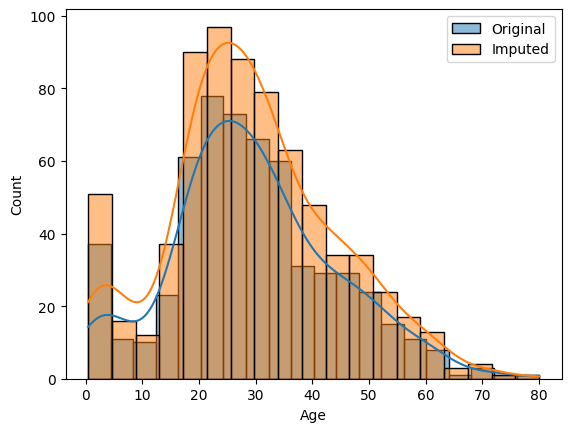

In [81]:
sns.histplot(X_train['Age'],label='Original', kde=True)
sns.histplot(X_train['Age_imputed'],label = 'Imputed', kde=True,)

plt.legend()
plt.show()

In [82]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  210.2517072477435
Variance after random imputation:  216.44249408156733


In [83]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,55.055189
Age,71.580633,210.251707,210.251707
Age_imputed,55.055189,210.251707,216.442494


<Axes: >

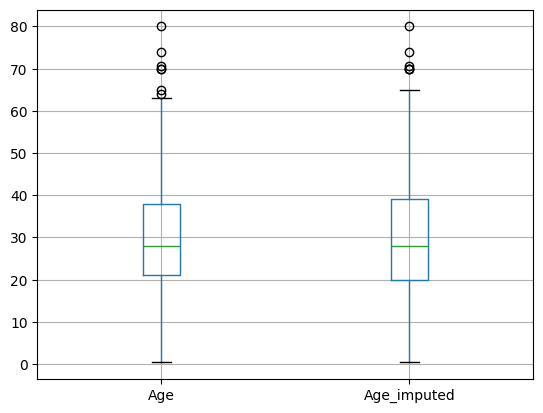

In [84]:
X_train[['Age', 'Age_imputed']].boxplot()

In [85]:
observation = {'Fare': 42}  # Replace 42 with the actual value
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [86]:
data = pd.read_csv('./dataset/house-train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [87]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [88]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [89]:
X = data
y = data['SalePrice']

In [90]:
X

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [93]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
37,TA,TA,153000,TA,TA
0,NaN,TA,208500,TA,NaN
330,NaN,TA,119000,TA,NaN
1215,NaN,TA,125000,TA,NaN
813,NaN,TA,157900,TA,NaN


In [94]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values 

C:\Users\asada\AppData\Local\Temp\ipykernel_1964\280618795.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'

In [95]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,145000,TA,Gd
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,TA,Po
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd
...,...,...,...,...,...
1095,Gd,TA,176432,TA,Gd
1130,TA,TA,135000,TA,TA
1294,NaN,TA,115000,TA,Gd
860,Gd,TA,189950,TA,Gd


In [96]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ], axis=1)

temp.columns = ['original', 'imputed']

In [97]:
temp    

,original,imputed
TA,0.951087,0.950342
Fa,0.032609,0.033390
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.001712


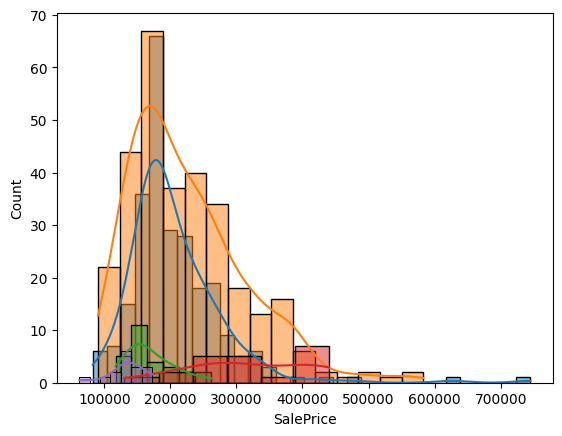

In [104]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.histplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],kde=True,label=category)
plt.show()

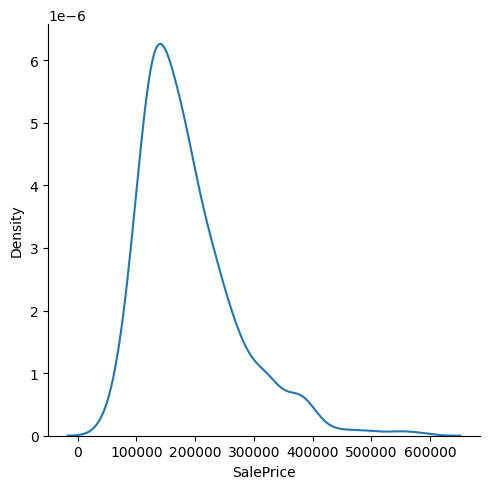

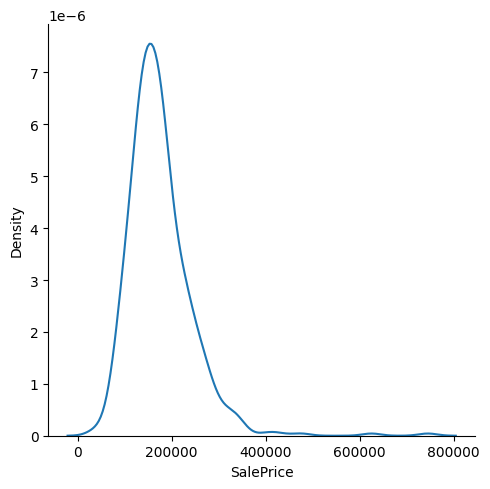

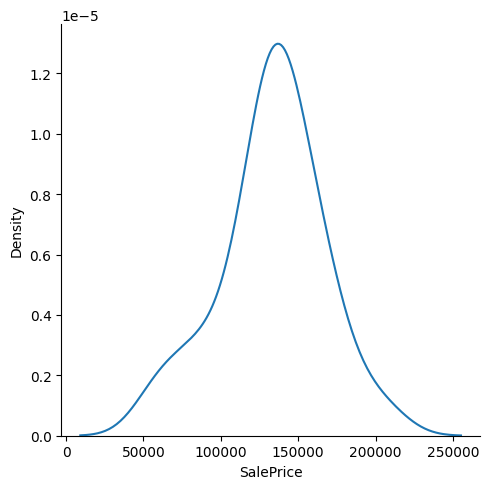

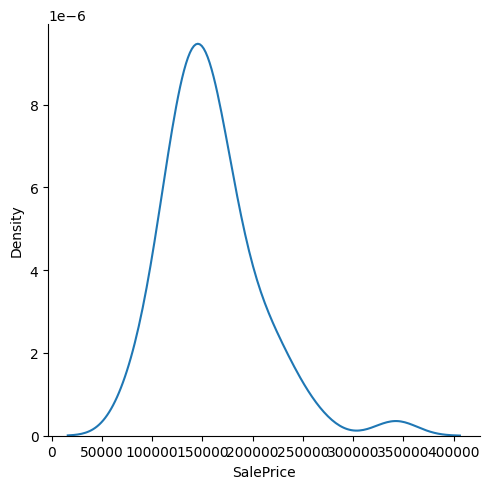

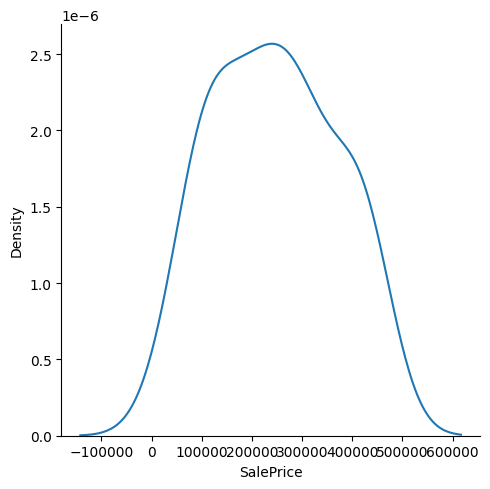

In [107]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.displot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category, kind='kde')
plt.show()